<a href="https://colab.research.google.com/github/YuvinMahwatta/Bank_Client_Prediction/blob/Data_Cleaning/Data%20Cleaning/Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the CSV file
input_file = 'bank-additional-full.csv'  # Replace with your actual file name
output_file = 'output_file.csv'  # Replace with your desired output file name

# Read the CSV file, specifying that the delimiter is a semicolon
# Assuming the column headers are on the first row
try:
    df = pd.read_csv(input_file, sep=';')

    # Save the cleaned data to a new CSV file
    df.to_csv(output_file, index=False)

    print(f"Data successfully separated into columns and saved to {output_file}")
except Exception as e:
    print(f"An error occurred: {e}")


An error occurred: [Errno 2] No such file or directory: 'bank-additional-full.csv'


In [ ]:
import pandas as pd

# Load the CSV file
file_path = 'output_file.csv'
df = pd.read_csv(file_path)

# Remove duplicate rows
df_cleaned = df.drop_duplicates()

# Save the cleaned data to an Excel file
output_excel_path = 'duplicate_removed_output.csv'
df_cleaned.to_csv(output_excel_path, index=False)

print(f'Duplicates removed. Cleaned file saved as {output_excel_path}')


Duplicates removed. Cleaned file saved as duplicate_removed_output.csv


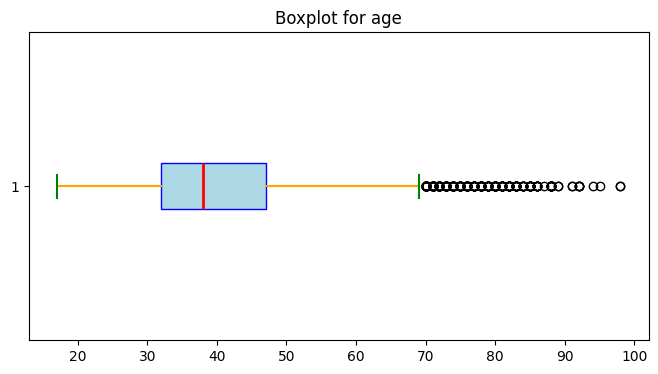

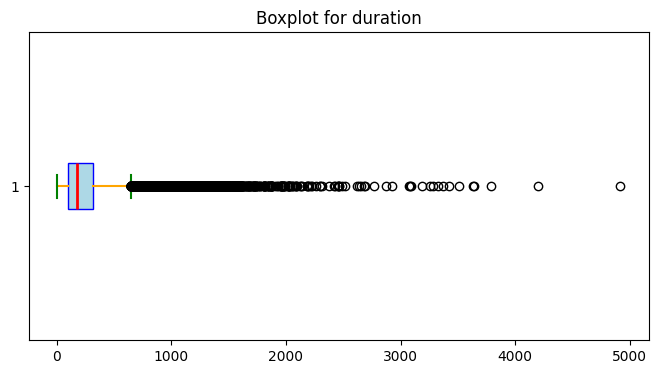

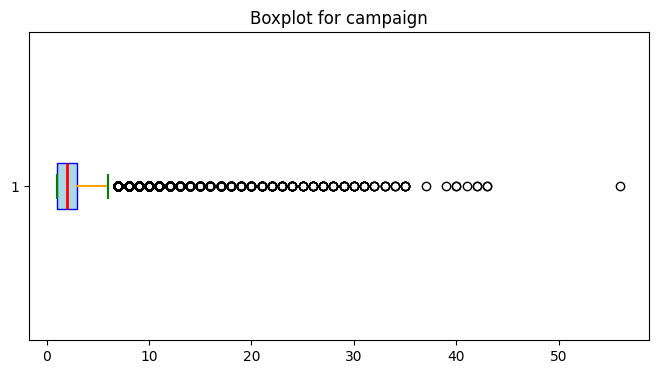

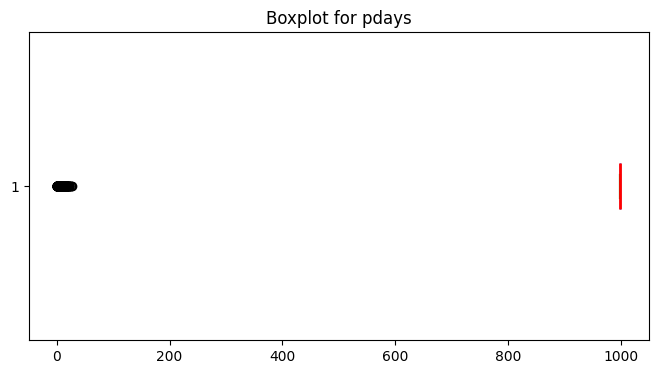

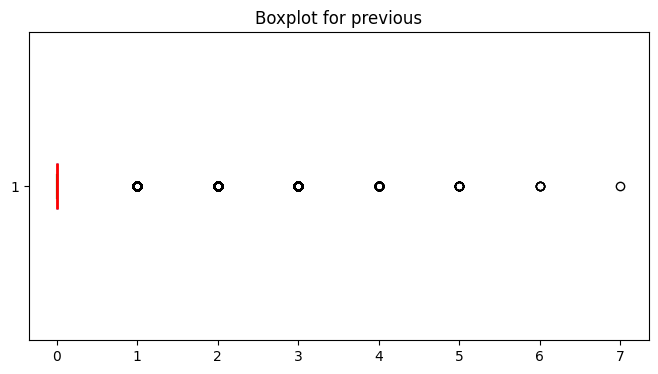

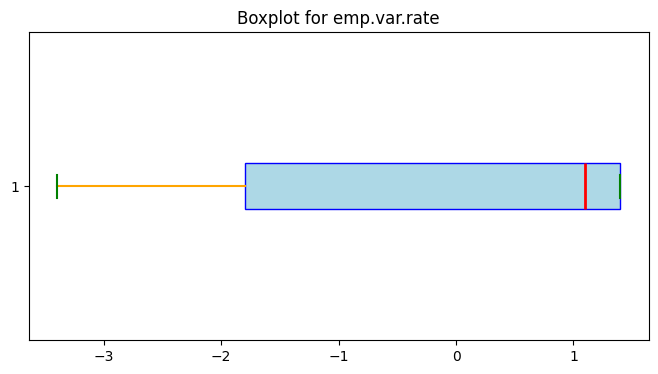

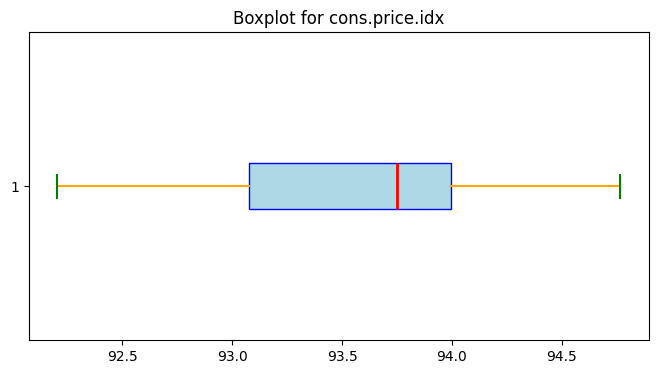

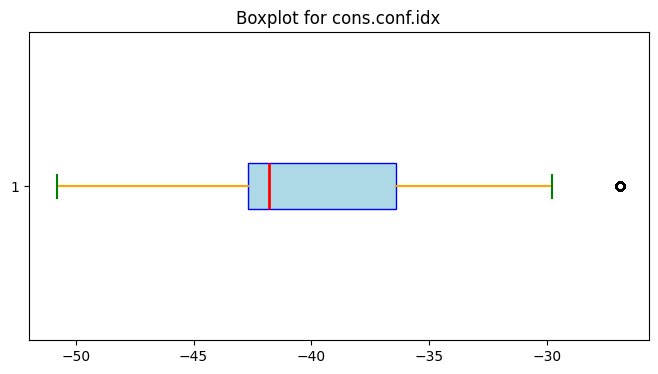

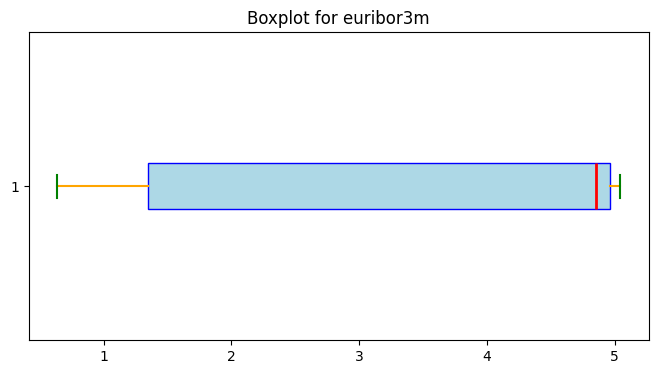

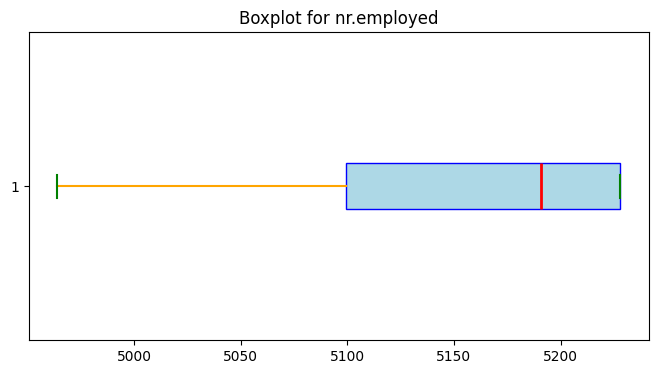

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'duplicate_removed_output.csv'
df = pd.read_csv(file_path)

# Check for outliers in numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    box = plt.boxplot(
        df[col].dropna(),
        vert=False,
        patch_artist=True,  # Fill the box with color
        boxprops=dict(facecolor='lightblue', color='blue'),  # Box color
        medianprops=dict(color='red', linewidth=2),  # Median line color
        whiskerprops=dict(color='orange', linewidth=1.5),  # Whisker color
        capprops=dict(color='green', linewidth=1.5)  # Cap color
    )
    plt.title(f'Boxplot for {col}')
    plt.show()


In [3]:
import pandas as pd

# Load the CSV file
file_path = 'duplicate_removed_output.csv'
df = pd.read_csv(file_path)

# Identify numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Remove outliers using IQR
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Save the cleaned data to a new CSV file
output_csv_path = 'outliers_removed_output.csv'
df.to_csv(output_csv_path, index=False)

print(f'Outliers removed. Cleaned file saved as {output_csv_path}')


Outliers removed. Cleaned file saved as outliers_removed_output.csv


In [4]:
import pandas as pd

# Load the CSV file
data = pd.read_csv('outliers_removed_output.csv')

# Perform one-hot encoding
encoded_data = pd.get_dummies(data)

# Replace True/False with 1/0
encoded_data = encoded_data.replace({True: 1, False: 0})

# Save the encoded data to a new CSV file
encoded_data.to_csv('encoded_dataset.csv', index=False)

print("One-hot encoding completed. Encoded file saved as 'encoded_data.csv'")


<ipython-input-4-8205b535b167>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  encoded_data = encoded_data.replace({True: 1, False: 0})


One-hot encoding completed. Encoded file saved as 'encoded_data.csv'


In [ ]:
import pandas as pd

# Load the CSV file
file_path = 'encoded_data.csv'
df = pd.read_csv(file_path)

# Display the first few rows to confirm the column names
print(df.head())

# Remove the 'y_no' column if it exists
if 'y_no' in df.columns:
    df.drop(columns=['y_no'], inplace=True)

# Save the updated dataframe to a new file
output_path = 'encoded_data_updated.csv'
df.to_csv(output_path, index=False)

print(f"'y_no' column removed. Updated file saved to {output_path}")


   age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56       261         1    999         0           1.1          93.994   
1   57       149         1    999         0           1.1          93.994   
2   37       226         1    999         0           1.1          93.994   
3   40       151         1    999         0           1.1          93.994   
4   56       307         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  ...  day_of_week_fri  \
0          -36.4      4.857       5191.0  ...                0   
1          -36.4      4.857       5191.0  ...                0   
2          -36.4      4.857       5191.0  ...                0   
3          -36.4      4.857       5191.0  ...                0   
4          -36.4      4.857       5191.0  ...                0   

   day_of_week_mon  day_of_week_thu  day_of_week_tue  day_of_week_wed  \
0                1                0                0               